In [2]:
import pandas as pd
import seaborn as sns
import random
import math
from sklearn import datasets, linear_model

In [3]:
df = pd.read_csv('SalariesSimple.csv')
print(df)

      total_experience_years  annual_base_pay
0                       13.0         125000.0
1                       15.0          65000.0
2                        4.0          86000.0
3                        4.0         105000.0
4                        4.0         110000.0
...                      ...              ...
1650                     1.0          60500.0
1651                     6.0         164000.0
1652                     7.0         150000.0
1653                     5.0          75000.0
1654                     2.0             50.0

[1655 rows x 2 columns]


In [4]:
df.dropna(axis=0, inplace=True)
df = df[(df['annual_base_pay'] >15000) & (df['total_experience_years']>0)]
df.drop(df[df['annual_base_pay']>= 300000].index, inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1420 entries, 0 to 1653
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   total_experience_years  1420 non-null   float64
 1   annual_base_pay         1420 non-null   float64
dtypes: float64(2)
memory usage: 33.3 KB


In [6]:
df.describe()

,total_experience_years,annual_base_pay
count,1420.000000,1420.000000
mean,6.949880,100932.009873
std,5.353317,46193.158326
min,0.500000,16543.000000
25%,3.000000,65962.500000
50%,5.000000,100000.000000
75%,10.000000,130000.000000
max,43.000000,290000.000000


<Axes: xlabel='total_experience_years', ylabel='annual_base_pay'>

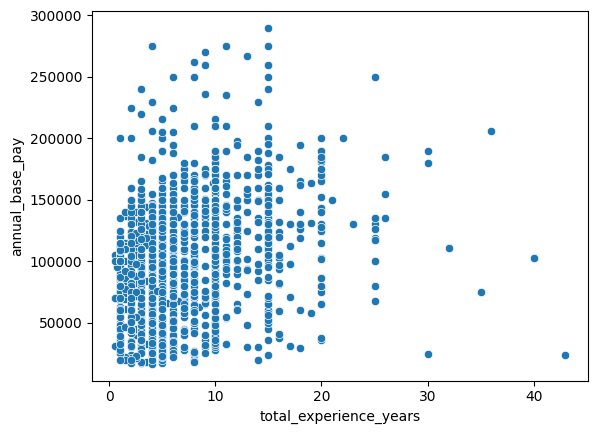

In [7]:
sns.scatterplot(data=df, x='total_experience_years', y="annual_base_pay")

In [8]:
df = df[(df['annual_base_pay'] >15000) & (df['total_experience_years']>0)]
print(df['annual_base_pay'].max())

290000.0


In [9]:
def testTrainSplit(data):
    length = len(df.index)
    splitLimit = int(length * 0.7)
    train = data[0: splitLimit]
    test = data[splitLimit + 1: length]
    return train, test

In [10]:
train, test = testTrainSplit(df)

In [11]:
def sumOfDistances(a, b, c, trainDF):
    sum = 0
    for row in range(0, len(trainDF.index)):
        exp = trainDF.iat[row, 0]
        pay = trainDF.iat[row, 1]
        distance = abs((a*exp) + (b*pay) + c) / math.sqrt((a*a) + (b*b))
        sum = sum + distance
    return sum

In [12]:
def trainLinearRegression(trainDF):
    count = 0
    slopes = {}
    while count < 1000:
        a = random.randint(15000, 20000) # Slope!
        b = -1 # Coefficient to y --> by = ax + c --> negative because we move to other side
        c = 900 # Y-intercept
        count = count + 1
        sum = sumOfDistances(a, b, c, train)
        slopes[a] = sum
    return slopes

In [13]:
trainSlopes = trainLinearRegression(train)
print(trainSlopes)

{19306: 3603.529451293553, 15900: 3654.259270760137, 19274: 3602.7437452806266, 19550: 3610.1230929754174, 18616: 3589.7619136003414, 16141: 3639.0077893113435, 17605: 3588.942716164178, 16667: 3612.545044196672, 15024: 3727.04432880482, 17450: 3590.9428892325336, 17446: 3590.995376423396, 17097: 3598.545087135814, 17572: 3589.3535088702065, 17740: 3587.51743060238, 18610: 3589.691223189405, 19310: 3603.6275332309747, 18922: 3595.0721860798467, 15666: 3671.014344621155, 16041: 3645.103467762713, 17449: 3590.9560087742198, 15042: 3725.3080279331084, 16869: 3605.1947829237984, 17369: 3592.2155447401265, 19942: 3621.1531596233053, 18347: 3587.1785797264256, 16943: 3602.883094710282, 17622: 3588.737308941922, 17307: 3593.4560903787483, 18473: 3588.1096694030407, 16526: 3618.583682108096, 16497: 3619.9391313744845, 19923: 3620.5562881662445, 16563: 3616.9179599597437, 15576: 3677.9849718755927, 16737: 3609.8125202940005, 15189: 3711.3364802046394, 19607: 3611.678105161335, 17576: 3589.30177

In [14]:
temp = min(trainSlopes.values())
res = [key for key in trainSlopes if trainSlopes[key] == temp]
 
print("slope: " + str(res[0]))
print("distace: " + str(temp))

slope: 18138
distace: 3586.475972055001


In [15]:
a = 18137
b = -1
c = 900
prediction = []
#ax +by = c
for row in range(0, len(test.index)):
    exp = test.iat[row, 0]
    prediction.append((c - (a * exp))/ b)
print(prediction)

[126059.0, 17237.0, 71648.0, 53511.0, 144196.0, 17237.0, 26305.5, 198607.0, 180470.0, 126059.0, 35374.0, 35374.0, 144196.0, 71648.0, 271155.0, 35374.0, 53511.0, 271155.0, 162333.0, 53511.0, 35374.0, 53511.0, 271155.0, 180470.0, 44442.5, 144196.0, 89785.0, 271155.0, 180470.0, 26305.5, 35374.0, 35374.0, 53511.0, 53511.0, 325566.0, 361840.0, 35374.0, 107922.0, 89785.0, 71648.0, 253018.0, 8168.5, 452525.0, 53511.0, 44442.5, 71648.0, 89785.0, 71648.0, 216744.0, 180470.0, 71648.0, 35374.0, 180470.0, 17237.0, 53511.0, 17237.0, 53511.0, 17237.0, 144196.0, 26305.5, 198607.0, 180470.0, 180470.0, 271155.0, 180470.0, 53511.0, 162333.0, 89785.0, 107922.0, 180470.0, 89785.0, 89785.0, 107922.0, 216744.0, 35374.0, 35374.0, 35374.0, 107922.0, 53511.0, 35374.0, 26305.5, 180470.0, 180470.0, 53511.0, 361840.0, 53511.0, 35374.0, 44442.5, 144196.0, 71648.0, 144196.0, 107922.0, 89785.0, 35374.0, 35374.0, 53511.0, 71648.0, 89785.0, 53511.0, 71648.0, 53511.0, 71648.0, 343703.0, 89785.0, 107922.0, 26305.5, 3537

In [16]:
actual = [row for row in test.iloc[:, 1]]
print(actual)

[145000.0, 62000.0, 120000.0, 150000.0, 153000.0, 58000.0, 112500.0, 130000.0, 120000.0, 72485.0, 44000.0, 44000.0, 156800.0, 75000.0, 58000.0, 130000.0, 105000.0, 150000.0, 171000.0, 48500.0, 75000.0, 125000.0, 125000.0, 165000.0, 117000.0, 72000.0, 119000.0, 210000.0, 120000.0, 22310.0, 61000.0, 120000.0, 120000.0, 120000.0, 140000.0, 80000.0, 65000.0, 70000.0, 40000.0, 135000.0, 120000.0, 100000.0, 135000.0, 130000.0, 123000.0, 103000.0, 77000.0, 69000.0, 101000.0, 106000.0, 100000.0, 120500.0, 140000.0, 114500.0, 70000.0, 112500.0, 220000.0, 100000.0, 250000.0, 110000.0, 155000.0, 190000.0, 160000.0, 132000.0, 125000.0, 97000.0, 30500.0, 159500.0, 160000.0, 141000.0, 190000.0, 130000.0, 90000.0, 115000.0, 57516.0, 75000.0, 64000.0, 140000.0, 18000.0, 100000.0, 77000.0, 128000.0, 150000.0, 126000.0, 175000.0, 65000.0, 92000.0, 21027.0, 140000.0, 110000.0, 130000.0, 155000.0, 135000.0, 140000.0, 225000.0, 110000.0, 50000.0, 95000.0, 58000.0, 66000.0, 89000.0, 128000.0, 164000.0, 3200

In [17]:
for i in range(len(test)):
    mse = ((actual[i] - prediction[i])**2)/len(train)
print(mse)

220137.18529707956


In [18]:
prediction24 = ((c - (a * 24))/ b)
print(prediction24)

434388.0
